In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. One tailed t-test
# Loading the file
times=pd.read_table('files_for_lab/machine.txt', encoding='utf-16')

In [3]:
times

,New machine,Old machine
0,42.1,42.7
1,41.0,43.6
2,41.3,43.8
3,41.8,43.3
4,42.4,42.5
5,42.8,43.5
6,43.2,43.1
7,42.3,41.7
8,41.8,44.0
9,42.7,44.1


In [4]:
times.columns

Index(['New machine', '    Old machine'], dtype='object')

In [5]:
# One of the columns has empty spaces at the beginning. I'm going to remove this empty spaces 
times.columns=['New machine', 'Old machine']

In [6]:
times.columns

Index(['New machine', 'Old machine'], dtype='object')

In [7]:
#compute statistics and p-value
# H0: new machine is faster than older 
# H1: new machine is slower than older
st.ttest_ind(times['New machine'], times['Old machine'])

Ttest_indResult(statistic=-3.3972307061176026, pvalue=0.0032111425007745158)

In [8]:
# p-value<0.05 but negative statistic means \mu_new machine-\mu_old machine < 0   ---->  \mu_new machine < \mu_old machine (new machine seems 
# faster than old machine). So we cannot reject the H0 hypothesis.

In [9]:
# 2. Matched Pairs Test 

In [10]:
pokemon = pd.read_csv('files_for_lab/pokemon.csv')

In [11]:
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [12]:
#compute statistics and p-value
# H0: defense and attack scores are equal 
# H1: defense and attack scores are different
st.ttest_rel(pokemon['Attack'], pokemon['Defense'])

Ttest_relResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05)

In [ ]:
# p-value<<<0.05 so we can reject the H0 hypothesis

In [ ]:
# 3. Write down all the steps to set up ANOVA

In [13]:
anova_data = pd.read_excel("files_for_lab/anova_lab_data.xlsx", engine="openpyxl")

In [14]:
anova_data

,Power,Etching Rate
0,160 W,5.43
1,180 W,6.24
2,200 W,8.79
3,160 W,5.71
4,180 W,6.71
5,200 W,9.20
6,160 W,6.22
7,180 W,5.98
8,200 W,7.90
9,160 W,6.01


In [17]:
# Null hypothesis H0: etching rate is the same for all different powers 
# Alternate hypothesis H1: etching rate is not the same for all different powers  

In [18]:
# What is the significance level. Usually set at 0.05 or 5%. This means that your results only have a 5% chance of occurring, or less,
# if the null hypothesis is actually true.

In [19]:
# What are the degrees of freedom of model
# There are two degrees of freedom, denoted df1 and df2, and are defined as follows:
# df1 = k-1 , where k is the number of independent groups (in this case k=3)
# df2 = N-k , where N represents the total number of observations in the analysis (in this case N=15) 

# What are the total DoF
# The total degrees of freedom is equal to the sum of the individual degrees of freedom for each sample. df = N- k = 15 -3 = 12

# What are the error terms
# SS(error) represents error (residual) sum-of-squares 
# df(error) represents degrees of freedom for error

In [ ]:
# 4. Use Python to conduct ANOVA

In [15]:
anova_data.columns

Index(['Power ', 'Etching Rate'], dtype='object')

In [16]:
anova_data.columns=['Power', 'Etching Rate']

In [17]:
anova_data['Power_count'] = anova_data.groupby('Power').cumcount() ##is the new index 
anova_data_pivot=anova_data.pivot(index='Power_count', columns='Power', values='Etching Rate')

In [18]:
anova_data_pivot

Power,160 W,180 W,200 W
Power_count,,,
0,5.43,6.24,8.79
1,5.71,6.71,9.20
2,6.22,5.98,7.90
3,6.01,5.66,8.15
4,5.59,6.60,7.55


In [19]:
anova_data_pivot.columns

Index(['160 W', '180 W', '200 W'], dtype='object', name='Power')

C:\Users\Usuario\AppData\Local\Temp/ipykernel_12716/3349862759.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x_titles)


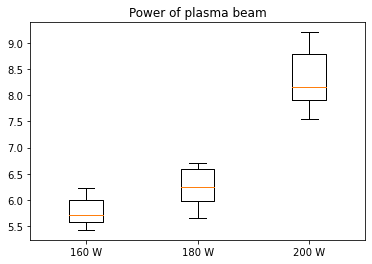

In [20]:
data = [anova_data_pivot['160 W'], anova_data_pivot['180 W'], anova_data_pivot['200 W']]
x_titles=anova_data_pivot.columns
fig1, ax1 = plt.subplots()
ax1.set_title('Power of plasma beam')
ax1.set_xticklabels(x_titles)
ax1.boxplot(data)
plt.show()

In [21]:
st.f_oneway(anova_data_pivot['160 W'],anova_data_pivot['180 W'], anova_data_pivot['200 W'])

F_onewayResult(statistic=36.87895470100505, pvalue=7.506584272358903e-06)

In [ ]:
# Since p-value is almost 0, we reject the null hypothesis.